## SVD
- SVD는 정방행렬뿐만 아니라 행과 열의 크기가 다른 행렬에도 적용할 수 있음
- SVD는 특이값 분해로 불리며 행렬 U와 V에 속한 벡터는 특이벡터(singular vector)이며 모든 특이벡터는 서로 직교하는 성질을 갖는다.
- 행렬의 대각에 위치한 값만 0이 아니고 나머지 위치의 값은 모두 0이다.
- $\sum$이 위치한 0이 아닌 값이 바로 행렬 A의 특이값이다.
- A의 차원이 m x n일 때 U의 차원이 m x m, $\sum$의 차원이 m x n, $V^T$의 차원이 n X n으로 분해한다.

$$A = U \sum V^T$$

In [1]:
# numpy의 svd 모듈 임폴트
import numpy as np
from numpy.linalg import svd

# 4x4 random 행렬 a 생성
np.random.seed(121)
a = np.random.randn(4,4)
print(np.round(a,3))

[[-0.212 -0.285 -0.574 -0.44 ]
 [-0.33   1.184  1.615  0.367]
 [-0.014  0.63   1.71  -1.327]
 [ 0.402 -0.191  1.404 -1.969]]


 SVD(Singular Value Decomposition)를 사용하여 행렬을 분해
 - SVD는 임의의 행렬 A를 세 개의 행렬 $U,Σ,V^T$
 로 분해합니다. 이를 통해 행렬의 구조를 분석하거나 차원을 축소할 수 있습니다.

In [5]:
# SVD 분해 : U행렬, Sigma 행렬, V전치 행렬을 반환
# Sigma 행렬은 0이 아닌 경우에만 1차원 행렬로 표현
U, Sigma, Vt = svd(a)
print(U.shape, Sigma.shape, Vt.shape)
print('U 행렬:\n', np.round(U,3))
print('Sigma 행렬:\n', np.round(Sigma,3))
print('V 전치 행렬의 크기:\n', np.round(Vt,3))

(4, 4) (4,) (4, 4)
U 행렬:
 [[-0.079 -0.318  0.867  0.376]
 [ 0.383  0.787  0.12   0.469]
 [ 0.656  0.022  0.357 -0.664]
 [ 0.645 -0.529 -0.328  0.444]]
Sigma 행렬:
 [3.423 2.023 0.463 0.079]
V 전치 행렬의 크기:
 [[ 0.041  0.224  0.786 -0.574]
 [-0.2    0.562  0.37   0.712]
 [-0.778  0.395 -0.333 -0.357]
 [-0.593 -0.692  0.366  0.189]]


원본 행렬 복원
- 대각행렬 변환: np.diag 함수를 사용하여 Σ를 대각 행렬로 변환합니다. 이는 SVD의 복원 과정에서 필요합니다.
- 원본 행렬 복원: U, Σ(대각 행렬로 변환된), $V^T$를 곱하여 원본 행렬을 복원합니다.

In [9]:
# Sigma를 다시 0을 포함한 대칭행렬로 변환
Sigma_mat = np.diag(Sigma)
a_ = np.dot(np.dot(U, Sigma_mat), Vt)
print(np.round(a_,3))

[[-0.212 -0.285 -0.574 -0.44 ]
 [-0.33   1.184  1.615  0.367]
 [-0.014  0.63   1.71  -1.327]
 [ 0.402 -0.191  1.404 -1.969]]


Truncated SVD
- Truncated SVD는 전체 SVD에서 상위 몇 개의 특이값 및 그에 대응하는 특이벡터들만을 사용하여 근사적인 행렬을 복원하는 방법입니다. Truncated SVD는 차원 축소와 데이터 압축에 유용합니다.
- 주로 데이터의 차원을 축소하여 계산 효율성을 높이고 노이즈를 제거하기 위해 사용됩니다.
- 상위 특이값만을 사용하면 데이터의 주요 구조를 유지하면서 차원을 줄일 수 있습니다.

In [11]:
# 다시 SVD를 수행하여 Sigma 값 확인
U, Sigma, Vt = svd(a)
print(U.shape, Sigma.shape, Vt.shape)
print('Sigma Value:\n', np.round(Sigma,3))

(4, 4) (4,) (4, 4)
Sigma Value:
 [3.423 2.023 0.463 0.079]


In [10]:
# U 행려의 경우는 Sigma와 내적을 수행하므로 Sigma의 앞 2행에 대응되는 앞 2열만 추출
U_ = U[:, :2]
Sigma_ = np.diag(Sigma[:2])

# V 전치 행렬의 경우는 앞 2행만 추출
Vt_ = Vt[:2]
print(U_.shape, Sigma_.shape, Vt_.shape)

# 행렬 복원
a_ = np.dot(np.dot(U_, Sigma_), Vt_)
print(np.round(a_,3))

(4, 2) (2, 2) (2, 4)
[[ 0.118 -0.422 -0.451 -0.303]
 [-0.265  1.188  1.62   0.38 ]
 [ 0.083  0.528  1.784 -1.258]
 [ 0.305 -0.107  1.341 -2.03 ]]


Truncated SVD를 이용한 행렬 분해
svd vs. svds
 - svd는 입력 행렬을 완전하게 분해하여 모든 특이값과 특이벡터를 반환, 중소 규모의 행렬에 적합
 - svds 함수는 희소행렬 또는 매우 큰 행렬에 대해 SVD를 수행할 때 사용
 - svds는 주어진 개수의 가장 큰 특이값과 그에 상응하는 특이벡터만을 계산해서 계산 비용을 절약하고 효율성을 높인다.

In [17]:
import numpy as np
from scipy.sparse.linalg import svds
from scipy.linalg import svd

# 원본 행렬을 출력하고, SVD를 적용할 경우 U, Sigma, Vt의 차원 확인
np.random.seed(121)
matrix = np.random.random((6,6))
print('원본행렬:\n',matrix)
U, Sigma, Vt = svd(matrix, full_matrices=False)
print('\n분해행렬차원:',U.shape, Sigma.shape, Vt.shape)
print('\nSigma행렬:\n',Sigma)

# Truncated SVD로 Sigma 행렬의 특이값을 4개로 하여 Truncated SVD 수행.
num_components = 4
U_tr, Sigma_tr, Vt_tr = svds(matrix, k=num_components)
print('\nTruncated SVD 분해행렬차원:',U_tr.shape, Sigma_tr.shape, Vt_tr.shape)
print('\nTruncated SVD Sigma값 행렬:\n',Sigma_tr)
matrix_tr = np.dot(np.dot(U_tr, np.diag(Sigma_tr)), Vt_tr)
print('\nTruncated SVD 행렬곱:\n',matrix_tr)
#

원본행렬:
 [[0.11133083 0.21076757 0.23296249 0.15194456 0.83017814 0.40791941]
 [0.5557906  0.74552394 0.24849976 0.9686594  0.95268418 0.48984885]
 [0.01829731 0.85760612 0.40493829 0.62247394 0.29537149 0.92958852]
 [0.4056155  0.56730065 0.24575605 0.22573721 0.03827786 0.58098021]
 [0.82925331 0.77326256 0.94693849 0.73632338 0.67328275 0.74517176]
 [0.51161442 0.46920965 0.6439515  0.82081228 0.14548493 0.01806415]]

분해행렬차원: (6, 6) (6,) (6, 6)

Sigma행렬:
 [3.2535007  0.88116505 0.83865238 0.55463089 0.35834824 0.0349925 ]

Truncated SVD 분해행렬차원: (6, 4) (4,) (4, 6)

Truncated SVD Sigma값 행렬:
 [0.55463089 0.83865238 0.88116505 3.2535007 ]

Truncated SVD 행렬곱:
 [[0.19222941 0.21792946 0.15951023 0.14084013 0.81641405 0.42533093]
 [0.44874275 0.72204422 0.34594106 0.99148577 0.96866325 0.4754868 ]
 [0.12656662 0.88860729 0.30625735 0.59517439 0.28036734 0.93961948]
 [0.23989012 0.51026588 0.39697353 0.27308905 0.05971563 0.57156395]
 [0.83806144 0.78847467 0.93868685 0.72673231 0.6740867  0.

복원된 행렬의 상태
- runcated SVD는 일부 특이값만 사용하기 때문에 원본 행렬을 완벽하게 복원하지 못할 수 있습니다. 복원된 행렬은 근사치가 됩니다.
- Truncated SVD를 사용하여 복원된 행렬과 원본 행렬 간의 차이를 비교할 수 있습니다.

#### NMF
- NMF(Non-negative Matrix Factorization, 비음수 행렬 분해)은 행렬을 두 개의 작은 행렬의 곱으로 분해하는 기법으로, 분해된 행렬의 모든 요소가 비음수(0 또는 양수)인 특징이 있습니다. 주로 데이터 마이닝, 이미지 처리, 텍스트 마이닝, 추천 시스템 등에서 사용됩니다.
- 주어진 행렬 V를 두 개의 비음수 행렬 W와 H로 분해하는 것을 목표로 합니다. 특정한 최적화 방법을 지정하지 않으며, 일반적으로는 곱셈 업데이트 규칙을 사용합니다. 그러나 SGD를 사용하여 NMF를 최적화할 수도 있습니다.
- Truncated SVD와 같이 낮은 랭크를 통한 행렬 근사(Low-Rank Approximation) 방식의 변형
- NMF는 원본 행렬 내의 모든 원소 값이 모두 양수라는 게 보장되면 좀 더 간단하게 두 개의 기반 양수 행렬로 분해될 수 있는 기법을 지칭

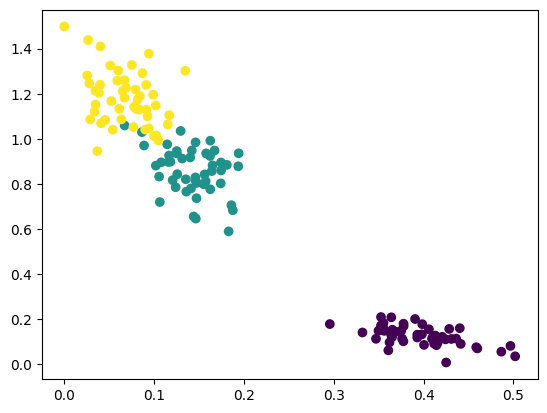

In [20]:
from sklearn.decomposition import NMF
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt


iris = load_iris()
iris_ftrs = iris.data

nmf = NMF(n_components=2, max_iter=500)
nmf.fit(iris_ftrs)
iris_nmf = nmf.transform(iris_ftrs)

plt.scatter(x=iris_nmf[:,0], y= iris_nmf[:,1], c=iris.target)
plt.show()